In [84]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

path_to_file = "../noOutliers.csv"
dataProj = pd.read_csv(path_to_file)
print(dataProj.head())
dataProj = dataProj.drop(['Id'], axis = 1)

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

     ...      EnclosedPorch  3SsnPorch

In [85]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

X = dataProj.iloc[:, :-1].values
y = dataProj.iloc[:, -1].values

import random
from sklearn.cross_validation import train_test_split
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [86]:
X1_train = pd.DataFrame(X_train)
X1_train.columns = [list(dataProj.columns)[:-1]]

y1_train = pd.Series(y_train)
#y1_train.names = ['SalePrice']

X1_test = pd.DataFrame(X_test)
X1_test.columns = [list(dataProj.columns)[:-1]]

In [401]:
# from sklearn.linear_model import Ridge
# def ridge_regression(data, predictors, alpha, models_to_plot={}):
#     #Fit the model
#     ridgereg = Ridge(alpha=alpha,normalize=True)
#     ridgereg.fit(data[predictors],y1_train)
#     y_pred = ridgereg.predict(data[predictors])
#     #print(y_pred)
#     #Check if a plot is to be made for the entered alpha
#     if alpha in models_to_plot:
#         plt.subplot(models_to_plot[alpha])
#         plt.tight_layout()
#         plt.plot(data.iloc[:,-29],y_pred)
#         plt.plot(data.iloc[:,-29],y1_train,'.')
#         plt.title('Plot for alpha: %.3g'%alpha)
    
#     #Return the result in pre-defined format
#     rss = sum((y_pred-y1_train)**2)
#     ret = [rss]
#     ret.extend([ridgereg.intercept_])
#     ret.extend(ridgereg.coef_)
#     return ret

In [87]:
# #Initialize predictors to be set of 15 powers of x
predictors=[i for [i] in list(X1_train.columns)]

# #Set the different values of alpha to be tested
# alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# #Initialize the dataframe for storing coefficients.
# col = ['rss','intercept'] + ['coef_%s'%i for i in predictors]
# ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
# coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# models_to_plot = {1e-15:331, 1e-10:332, 1e-8:333, 1e-4:334, 1e-3:335, 1e-2:336, 1:337, 5:338, 10:339}
# for i in range(10):
#     coef_matrix_ridge.iloc[i,] = ridge_regression(X1_train, predictors, alpha_ridge[i], models_to_plot)

In [88]:
#Set the display format to be scientific for ease of analysis
# pd.options.display.float_format = '{:,.2g}'.format
# coef_matrix_ridge

In [89]:
from sklearn import linear_model
alpha_ridge1 = 10**np.linspace(5, -2, 100)
ridge1= linear_model.RidgeCV(alphas=alpha_ridge1, cv=20).fit(X_train,np.ravel(y_train))

ridgeCoef1 = pd.DataFrame(data=ridge1.coef_, index = predictors).reset_index()


In [51]:
#ridgereg = Ridge(alpha=ridge1.alpha_,normalize=True)
#ridgereg.fit(X_train,np.ravel(y_train))
y_pred = ridge1.predict(X_test)

In [53]:
ridge1.score(X_train, y_train)

0.918627402269028

In [54]:
ridge1.alpha_

17.886495290574352

In [55]:
#rss = sum((y_pred-y1_train)**2)
#ret = [rss]
ridge1.intercept_
#ridge1.coef_

-1297836.41134371

In [56]:
import numpy as np

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [57]:
hyp = y_pred
targ = y_test
rmsle(hyp, targ)

0.14495176451104436

In [58]:
import statsmodels.stats.outliers_influence #variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
#variance_inflation_factor()

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

vifs = calculate_vif_(X1_test)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [67]:
vifsOverFive = {k: v for k, v in vifs.items() if v > 10 or  v == 'inf'}

In [80]:
#ridgeCoef1.sort_values(ascending = True, by = 0)
#vifsOverFive = [i for [i] in list(vifsOverFive)]
#vifsOverFive
vifs

{('1stFlrSF',): inf,
 ('2ndFlrSF',): inf,
 ('3SsnPorch',): 3.233298974038988,
 ('Alley',): 4.870349282350112,
 ('BedroomAbvGr',): 100.17514462330227,
 ('BldgType_2fmCon',): inf,
 ('BldgType_Duplex',): inf,
 ('BldgType_Twnhs',): inf,
 ('BldgType_TwnhsE',): inf,
 ('BsmtCond',): 403.0714948357442,
 ('BsmtExposure',): 66.41671730755401,
 ('BsmtFinSF1',): inf,
 ('BsmtFinSF2',): inf,
 ('BsmtFinType1',): 40.202625908210415,
 ('BsmtFinType2',): 62.253117642387004,
 ('BsmtFullBath',): 8.914300293441592,
 ('BsmtHalfBath',): 2.873339649081387,
 ('BsmtQual',): 231.17268227835683,
 ('BsmtUnfSF',): inf,
 ('CentralAir',): 207.83929777415554,
 ('Condition1_Artery',): 5.11635083815932,
 ('Condition1_Feedr',): 4.480607491219509,
 ('Condition1_PosA',): inf,
 ('Condition1_PosN',): 4.851509173120837,
 ('Condition1_RRAe',): 2.5604316042086985,
 ('Condition1_RRAn',): 11.041167327008152,
 ('Condition1_RRNe',): nan,
 ('Condition1_RRNn',): 46.06825547999608,
 ('Condition2_Artery',): 100.2095273279261,
 ('Condit

In [72]:
dataProj2 = dataProj.drop(vifsOverFive, axis = 1)

In [73]:
X = dataProj2.iloc[:, :-1].values
y = dataProj2.iloc[:, -1].values

import random
from sklearn.cross_validation import train_test_split
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X1_train = pd.DataFrame(X_train)
X1_train.columns = [list(dataProj2.columns)[:-1]]

y1_train = pd.Series(y_train)

In [74]:
predictors2=[i for [i] in list(X1_train.columns)]

In [75]:
alpha_ridge1 = 10**np.linspace(5, -2, 100)
ridge2= linear_model.RidgeCV(alphas=alpha_ridge1, cv=20).fit(X1_train,np.ravel(y1_train))

ridgeCoef2 = pd.DataFrame(data=ridge2.coef_, index = predictors2).reset_index()

In [78]:
y_pred = ridge2.predict(X_test)
hyp = y_pred
targ = y_test
rmsle(hyp, targ)

0.2736065969780999

In [37]:
len(dataProj2.columns)


72

In [39]:
len(dataProj.columns)

217

In [40]:
len(vifsOverFive)

145

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1])) # in Python3 use list(range(X.shape[1]))
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(X.iloc[variables].values, ix) for ix in range(X.iloc[variables].shape[1])]

        maxloc = vif.index(max(vif))
        print(maxloc)
        if max(vif) > thresh:
            print('dropping' + str(X.iloc[variables].columns[maxloc]) + 'at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[variables]

In [159]:
calculate_vif_(X1_test)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


3
dropping('MSSubClass_45',)at index: 3


AttributeError: 'list' object has no attribute 'iloc'

In [114]:
variables = [i for i in list(range(X1_test.shape[1]))]

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5):
    empty_list = []
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + str(X[cols[variables]].columns[maxloc]) + '\' at index: ' + str(maxloc))
            empty_list.append(str(X[cols[variables]].columns[maxloc]))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    print(X[cols[variables]])
    return empty_list

In [184]:
calculate_vif_(X1_test)

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping '('MSSubClass_75',)' at index: 6
dropping '('MSSubClass_90',)' at index: 8
dropping '('MSSubClass_120',)' at index: 8
dropping '('MSSubClass_190',)' at index: 10
dropping '('Condition1_PosA',)' at index: 50
dropping '('Condition2_RRAe',)' at index: 59
dropping '('RoofStyle_Mansard',)' at index: 75
dropping '('Exterior1st_AsbShng',)' at index: 83
dropping '('Exterior1st_CemntBd',)' at index: 87
dropping '('BsmtFinSF1',)' at index: 168
dropping '('1stFlrSF',)' at index: 174
dropping '('YrSold',)' at index: 204
dropping '('YearBuilt',)' at index: 159
dropping '('YearRemodAdd',)' at index: 159
dropping '('GarageQual',)' at index: 189
dropping '('Street',)' at index: 154
dropping '('MiscVal',)' at index: 198
dropping '('GarageCond',)' at index: 188
dropping '('LandSlope',)' at index: 155
dropping '('HouseStyle_1Story',)' at index: 67
dropping '('Functional',)' at index: 180
dropping '('GrLivArea',)' at index: 171
dropping '('Exterior1st_MetalSd',)' at index: 88
dropping '('KitchenA

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_180,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,PoolQC,Shed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,203.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,436.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,163.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,108.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,160.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,364.0,17.0,0.0,0.0,182.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,143.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,84.0,0.0,196.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,140.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,125.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
X1_test[cols[variables]]

NameError: name 'cols' is not defined

In [178]:
labels=[132, 133, 134, 136, 138, 139, 129, 141, 142, 143, 123, 124, 125, 113, 114, 115, 118, 119, 120, 121, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 173, 174, 175, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 5, 6, 7, 8, 107, 108, 189, 190, 191, 193, 182, 183, 184, 185, 186, 187, 188, 44, 45, 46, 47, 50, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 146, 147, 149, 78, 80, 81, 82, 99, 100, 101, 102, 103, 90, 91, 92, 93, 94, 95, 199, 200, 201, 202, 203, 204, 205, 206, 194, 195, 196, 197, 72, 73, 74, 75, 35, 36, 37, 38, 39, 3, 145, 12, 18, 126, 15, 16, 97, 77, 212, 176, 40, 2, 207, 180, 181, 208]

In [179]:
len(labels)

149

In [181]:
X1_test.iloc[labels]

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,PoolQC,Shed,MiscVal,MoSold,YrSold
132,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2006.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2008.0
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0
139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0
129,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,65.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0
142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2008.0


In [185]:
cleanup_nums = {"LandSlope": {"Gtl": 3, "Mod": 2, "Sev": 1},
                
                "ExterQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1},
                
                "ExterCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
                
                "BsmtQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, np.nan: 1},
                
                "BsmtCond": {"Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "BsmtExposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 2, np.nan: 1},
                
                "BsmtFinType1": {'GLQ':7, 'ALQ':6, 'Unf':2, 'Rec':4, 'BLQ':5, np.nan:1, 'LwQ':3},
                
                "BsmtFinType2": {'GLQ':7, 'ALQ':6, 'Unf':2, 'Rec':4, 'BLQ':5, np.nan:1, 'LwQ':3},
                
                "HeatingQC": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
                
                "KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1},
                
                "Functional": {'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1},
                
                "FireplaceQu": {"Ex": 6, "Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "GarageFinish": {'RFn': 3, 'Unf': 2, 'Fin': 4, np.nan: 1},
                
                "GarageQual": {"Ex": 6, "Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "GarageCond": {"Ex": 6, "Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "PavedDrive": {'Y':3, 'N':1, 'P':2},

               }

In [332]:
# LandSlope
slope3 = dataProj[dataProj['BsmtCond'] == 3].SalePrice.mean()
slope2 = dataProj[dataProj['BsmtCond'] == 2].SalePrice.mean()
slope1 = dataProj[dataProj['BsmtCond'] == 1].SalePrice.mean()


print(slope1)
print(slope2)
print(slope3)

105652.8918918919
64000.0
121809.53333333334


In [479]:
def new_Ords(x, data):
    dict = {}
    for i in x:
        z = set(data[i])
        list = []
        for j in z:
            list.append(data[data[i] == j].SalePrice.mean())
            for k in list:
                dict[i,j] = k/list[0]
    return dict



In [212]:

ords = list({k for k, v in cleanup_nums.items()})
#dataProj.iloc[cleanup_nums]

In [329]:
ords

['HeatingQC',
 'Functional',
 'BsmtFinType2',
 'PavedDrive',
 'GarageFinish',
 'FireplaceQu',
 'BsmtQual',
 'ExterQual',
 'KitchenQual',
 'BsmtCond',
 'LandSlope',
 'BsmtFinType1',
 'ExterCond',
 'BsmtExposure',
 'GarageQual',
 'GarageCond']

In [480]:
newOrdList  = new_Ords(ords, dataProj)
newOrdList

{('BsmtCond', 1): 1.0,
 ('BsmtCond', 2): 0.6057572003375664,
 ('BsmtCond', 3): 1.152921904475398,
 ('BsmtCond', 4): 1.711848808406002,
 ('BsmtCond', 5): 2.021713782438358,
 ('BsmtExposure', 1): 1.0,
 ('BsmtExposure', 2): 1.5582766846085625,
 ('BsmtExposure', 3): 1.8886100509976091,
 ('BsmtExposure', 4): 2.266941900725117,
 ('BsmtFinType1', 1): 1.0,
 ('BsmtFinType1', 2): 1.615389542946186,
 ('BsmtFinType1', 3): 1.437279188326281,
 ('BsmtFinType1', 4): 1.3809708186251517,
 ('BsmtFinType1', 5): 1.4073651555348299,
 ('BsmtFinType1', 6): 1.4896135252523457,
 ('BsmtFinType1', 7): 2.1798686101283824,
 ('BsmtFinType2', 1): 1.0,
 ('BsmtFinType2', 2): 1.726974022300287,
 ('BsmtFinType2', 3): 1.5299050124845046,
 ('BsmtFinType2', 4): 1.523589479974642,
 ('BsmtFinType2', 5): 1.4071381870183264,
 ('BsmtFinType2', 6): 1.8056507380548343,
 ('BsmtFinType2', 7): 1.712988065128693,
 ('BsmtQual', 1): 1.0,
 ('BsmtQual', 2): 1.095019989512536,
 ('BsmtQual', 3): 1.3307139239215813,
 ('BsmtQual', 4): 1.89910

In [277]:
newOrds = [(k) for k, v in newOrdList.items()]
#newOrds = [v for k, v in newOrdList.items()]

In [483]:
import itertools
list = []
for i in newOrdList.keys():
    list.append(i[0])

print(set(list))

{'HeatingQC', 'Functional', 'BsmtFinType2', 'PavedDrive', 'FireplaceQu', 'GarageQual', 'BsmtQual', 'ExterQual', 'KitchenQual', 'BsmtCond', 'LandSlope', 'BsmtFinType1', 'ExterCond', 'GarageFinish', 'BsmtExposure', 'GarageCond'}


In [487]:
for i in list:
    for j in dataProj[i]:
        for k in newOrdList.keys():
            if j == k[1]:
                print()

    


1.0
1.4243619516772226
1.6175460177712562
1.7972216475095784
2.4293236390046737
1.0
0.6651162790697674
1.1933964562569215
1.100719822812846
1.1181445508435932
1.101831061213579
1.4035892511074197
1.0
1.726974022300287
1.5299050124845046
1.523589479974642
1.4071381870183264
1.8056507380548343
1.712988065128693
1.0
1.155378009227626
1.6042953595693545
1.0
1.3708479384918975
1.9446564065162342
2.2630005537913025
1.0
0.9181545937593952
1.1676560625696462
1.4289978470260154
1.581767997404859
2.2396894911237615
1.0
1.095019989512536
1.3307139239215813
1.8991011293954707
3.002297906477786
1.0
1.631224582557477
2.602713648496503
4.082644955979511
1.0
1.3213869163130822
1.9917378519686326
3.008023860971372
1.0
0.6057572003375664
1.152921904475398
1.711848808406002
2.021713782438358
1.0
1.1451848831693674
1.084051170376499
1.0
1.615389542946186
1.437279188326281
1.3809708186251517
1.4073651555348299
1.4896135252523457
2.1798686101283824
1.0
1.341112978524743
2.373301760155539
2.1666932612125307


In [470]:
set(list)

{'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'LandSlope',
 'PavedDrive'}

In [328]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],'B': [5, 6, 7, 8, 9], 'C': ['a', 'b', 'c', 'd', 'e']})
df.replace(0, 5)

,A,B,C
0,5,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [ ]:
for i in df:
    df.replace({0: 10, 1: 100})

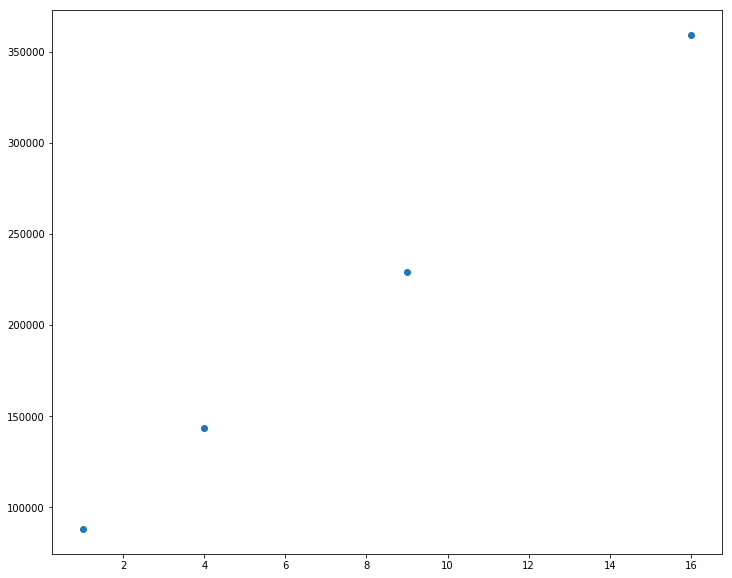

In [345]:
test_exterqual = dataProj.groupby('ExterQual').mean()
plt.scatter(x= [i**2 for i in test_exterqual.index], y = test_exterqual['SalePrice'])

In [489]:
path_to_file = "bg_train.csv"
dataProj = pd.read_csv(path_to_file)

In [490]:
dataProj

,SalePrice,BedroomAbvGr,BldgType_2fam,BldgType_Twnhs,BsmtExposure,BsmtFinType1,CentralAir_0,Condition1_Pos,Condition1_RR,Condition1_St,...,Street_0,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YrSinceRemo,YrSold,bathsF,bathsH,porchSF,totSF
0,208500,3,0,0,2,7,0,0,0,0,...,0,8,0,2003,0,2008,3.0,1.0,0,6584356.0
1,181500,3,0,0,3,6,0,0,0,1,...,0,6,298,1976,0,2007,2.0,1.0,0,6370576.0
2,223500,3,0,0,2,7,0,0,0,0,...,0,6,0,2001,1,2008,3.0,1.0,0,7322436.0
3,140000,3,0,0,2,6,0,0,0,0,...,0,7,0,1915,55,2006,2.0,0.0,272,6115729.0
4,250000,4,0,0,3,7,0,0,0,0,...,0,9,192,2000,0,2008,3.0,1.0,0,11175649.0
5,143000,1,0,0,2,7,0,0,0,0,...,0,5,40,1993,2,2009,2.0,1.0,320,4656964.0
6,307000,3,0,0,3,7,0,0,0,0,...,0,7,255,2004,1,2007,3.0,0.0,0,11424400.0
7,200000,3,0,0,2,6,0,1,0,0,...,0,7,235,1973,0,2009,3.0,1.0,228,10220809.0
8,129900,2,0,0,2,2,0,0,0,1,...,0,8,90,1931,19,2008,2.0,0.0,205,7431076.0
9,118000,2,1,0,2,7,0,0,0,1,...,0,5,0,1939,11,2008,2.0,0.0,0,4276624.0
